In [1]:
import pandas as pd


In [2]:
# Path to train & test datasets
train_path= '../data/raw/training/UNSW_NB15_training-set.csv'
test_path= '../data/raw/testing/UNSW_NB15_testing-set.csv'

# Load train & test datasets
train_df= pd.read_csv(train_path)
test_df= pd.read_csv(test_path)

# Combine test$training for exploaration (but keep train/test info seprately)
df= pd.concat([train_df, test_df], ignore_index=True)

print("TrainingDateset shape:", train_df.shape)
print("TestingDateset shape:", test_df.shape)
print("CombinedDateset shape:", df.shape)




TrainingDateset shape: (175341, 45)
TestingDateset shape: (82332, 45)
CombinedDateset shape: (257673, 45)


In [3]:
# Preview the first 10 rows of the dataset
print(df.head(10))

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   
5   6  0.380537   tcp       -   FIN     10      6     534     268  39.417980   
6   7  0.637109   tcp       -   FIN     10      8     534     354  26.683033   
7   8  0.521584   tcp       -   FIN     10      8     534     354  32.593026   
8   9  0.542905   tcp       -   FIN     10      8     534     354  31.313031   
9  10  0.258687   tcp       -   FIN     10      6     534     268  57.985135   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1         

In [4]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [5]:
# Get summary statistics of the dataset
print(df.describe())

                  id            dur          spkts          dpkts  \
count  257673.000000  257673.000000  257673.000000  257673.000000   
mean    72811.823858       1.246715      19.777144      18.514703   
std     48929.917641       5.974305     135.947152     111.985965   
min         1.000000       0.000000       1.000000       0.000000   
25%     32210.000000       0.000008       2.000000       0.000000   
50%     64419.000000       0.004285       4.000000       2.000000   
75%    110923.000000       0.685777      12.000000      10.000000   
max    175341.000000      59.999989   10646.000000   11018.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  2.576730e+05  2.576730e+05  2.576730e+05  257673.000000  257673.000000   
mean   8.572952e+03  1.438729e+04  9.125391e+04     180.000931      84.754957   
std    1.737739e+05  1.461993e+05  1.603446e+05     102.488268     112.762131   
min    2.400000e+01  0.000000e+00  0.000000e+00       

In [6]:
# missing values
df.isnull().sum().sort_values(ascending=False).head(10)


id         0
dur        0
proto      0
service    0
state      0
spkts      0
dpkts      0
sbytes     0
dbytes     0
rate       0
dtype: int64

In [7]:
# Binary lavel distribution
print(df['label'].value_counts(normalize=True))

label
1    0.639077
0    0.360923
Name: proportion, dtype: float64


In [8]:
# attack categories distribution
print(df['attack_cat'].value_counts(normalize=True))

attack_cat
Normal            0.360923
Generic           0.228472
Exploits          0.172797
Fuzzers           0.094096
DoS               0.063464
Reconnaissance    0.054282
Analysis          0.010389
Backdoor          0.009039
Shellcode         0.005864
Worms             0.000675
Name: proportion, dtype: float64


In [9]:
import matplotlib.pyplot as plt
from turtle import title

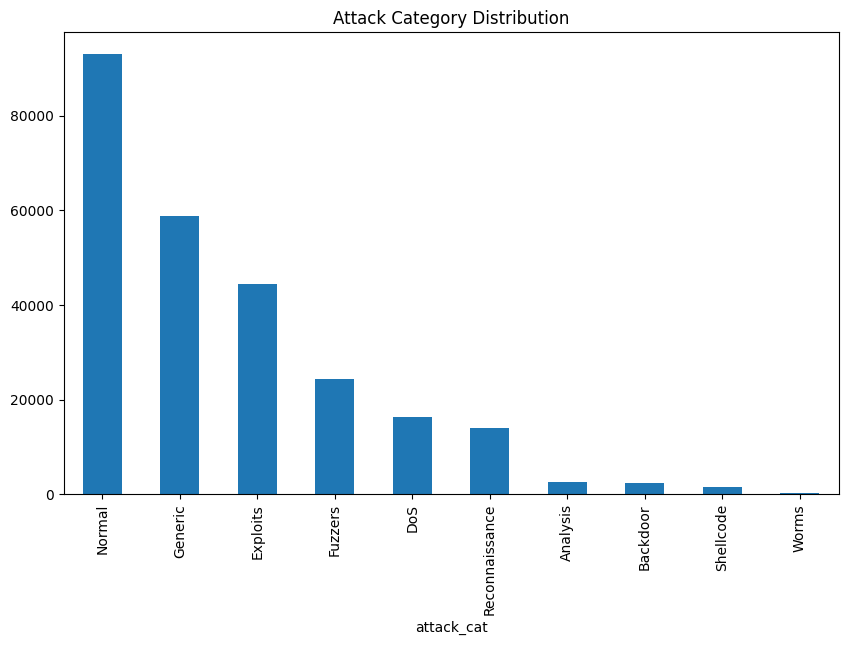

In [10]:

df['attack_cat'].value_counts().plot(kind='bar', figsize=(10,6), title="Attack Category Distribution")
plt.show()

In [11]:
# list of all columns
df.columns.tolist()

# Example: unique values in protocol
print("Protocols:", df['proto'].unique()[:10])
print("Services:", df['service'].unique()[:10])
print("States:", df['state'].unique()[:10])

Protocols: ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp']
Services: ['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3']
States: ['FIN' 'INT' 'CON' 'ECO' 'REQ' 'RST' 'PAR' 'URN' 'no' 'ACC']


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


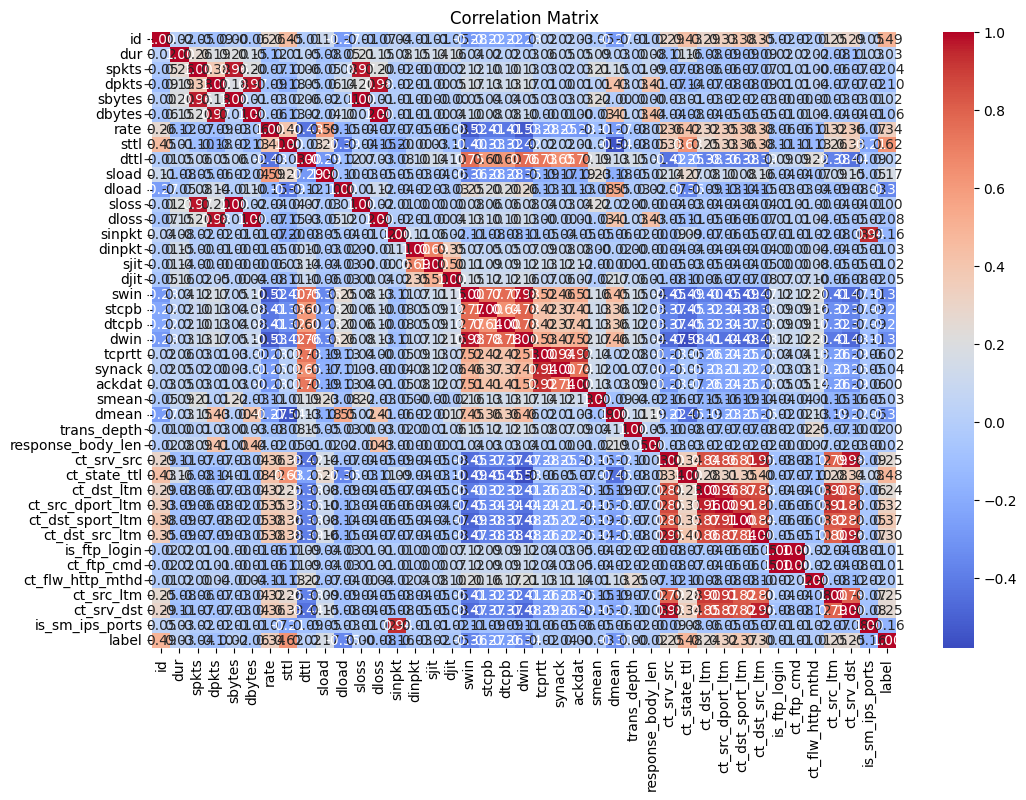

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute corelation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

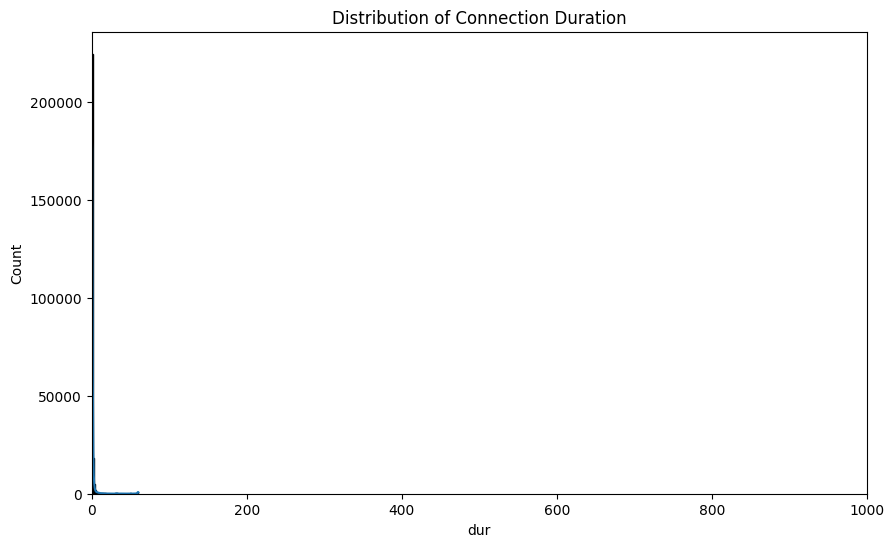

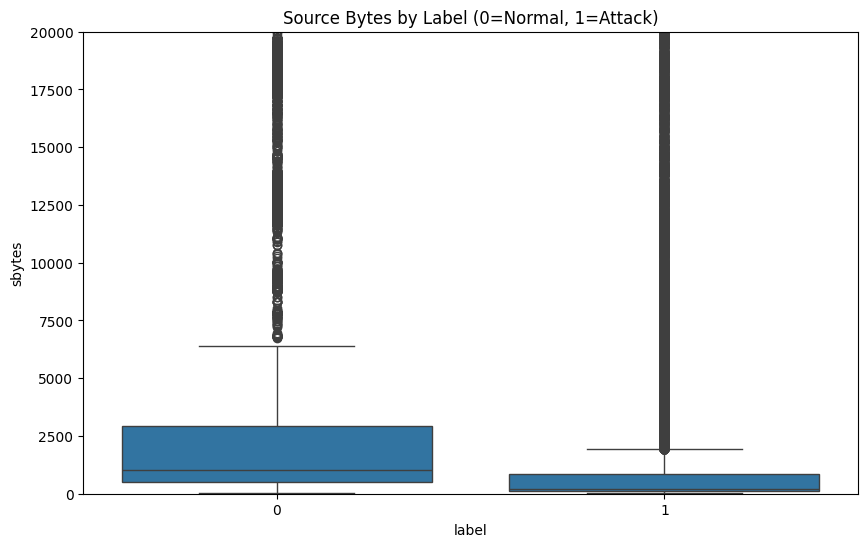

In [14]:
# Example: distribution of connection duration
plt.figure(figsize=(10,6))
sns.histplot(df['dur'], bins=50, kde=True)
plt.title("Distribution of Connection Duration")
plt.xlim(0, 1000)  # to avoid extreme outliers dominating
plt.show()

# Example: compare sbytes by label
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='sbytes', data=df)
plt.title("Source Bytes by Label (0=Normal, 1=Attack)")
plt.ylim(0, 20000)  # focus on reasonable range
plt.show()


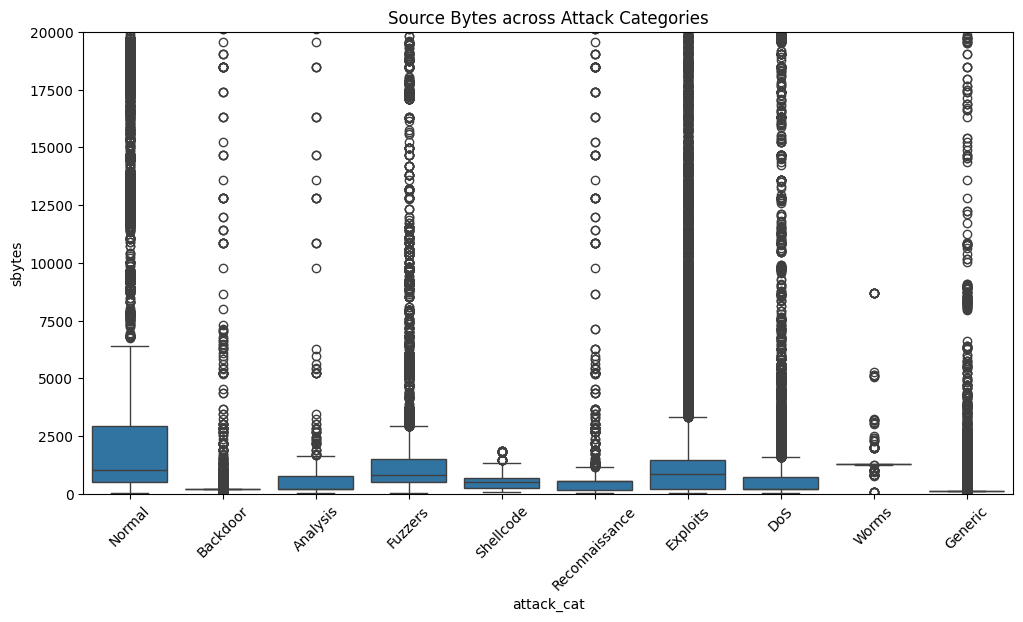

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x="attack_cat", y="sbytes", data=df)
plt.xticks(rotation=45)
plt.title("Source Bytes across Attack Categories")
plt.ylim(0, 20000)
plt.show()


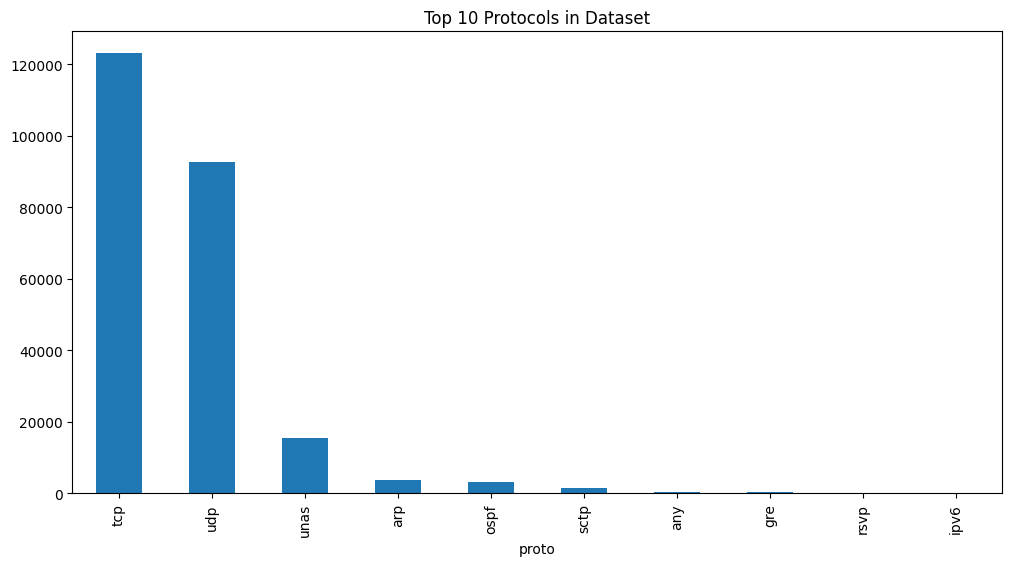

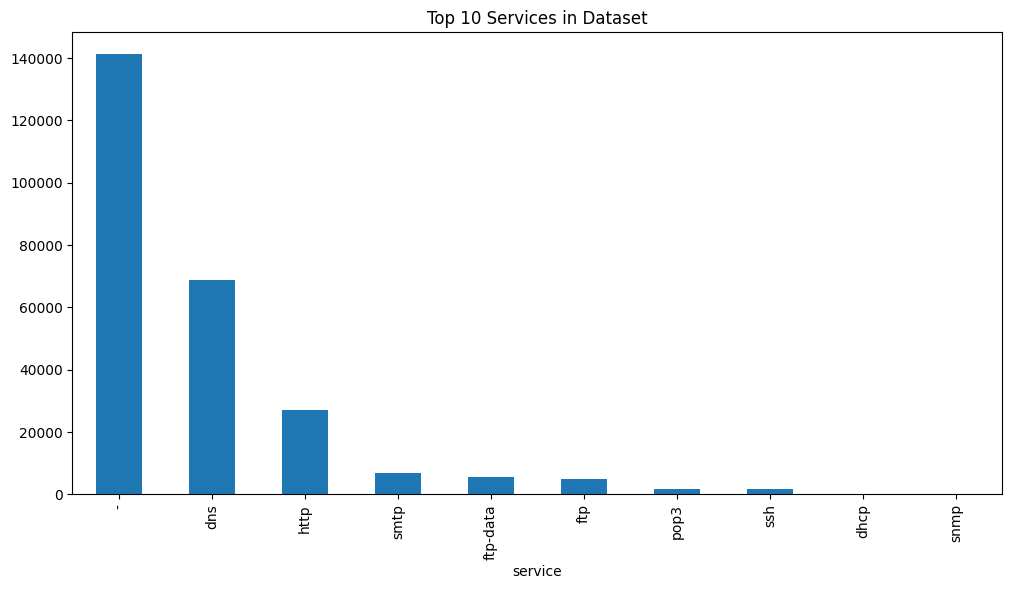

In [16]:
plt.figure(figsize=(12,6))
df['proto'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Protocols in Dataset")
plt.show()

plt.figure(figsize=(12,6))
df['service'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Services in Dataset")
plt.show()
